In [15]:
import pandas as pd
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/uvini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/uvini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
def removeUnwantedCharacters(text):
    unwanted_chars = [';', ':', '!', "*", "-","_" ]
    pattern = r'\b[A-Z]+\-[0-9]+\b' # defining the regular expression
    technical_terms = re.findall(pattern, text)
    words = text.split(" ")
    new_words = []
    
    # applying the match
    for word in words:
      if word in technical_terms:
        new_words.append(word)
        continue
      for c in unwanted_chars:
        word = word.replace(c, " ")
      new_words.append(word)

    formatted_text = " ".join(new_words)
    return formatted_text

def cleaningText(text):
    pattern_1 = r'\[\s*[0-9]+\s*\]'
    cleaned_text = re.sub(pattern_1,"",text)
    pattern_2 = r'[\'’]s'
    cleaned_text = re.sub(pattern_2,"",cleaned_text)
    pattern_3 = r'([A-Za-z]+)\/([A-Za-z]+)'
    matches = re.findall(pattern_3, cleaned_text)
    for match in matches:
        replaced = match[0] + ' ' + match[1]
        cleaned_text = cleaned_text.replace(match[0] + '/' + match[1], replaced)
    cleaned_text = cleaned_text.replace('('," ").replace(")"," ").replace(",","")
    return cleaned_text

cust_stopwords = ["method", "data"]
stop_words = set(stopwords.words('english'))

def remove_stopwords(abstract):
    word_tokens = word_tokenize(abstract)
    filtered_tokens = [word for word in word_tokens if word.lower() not in stop_words]
    return filtered_tokens

def generate_bigrams(tokens):
    bigram_list = list(bigrams(tokens))
    bigrams_combined = [' '.join(bigram) for bigram in bigram_list]
    return bigrams_combined
  
def generate_wordcloud(words,title):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vectorizer.fit_transform(words)
    vectorizer.vocabulary_
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    words_dict = dict(words_freq)
    
    print (words_freq[:100])
    wordcloud = WordCloud(width = 800, height = 800,
        background_color ='white',
        stopwords = stop_words,
        min_font_size = 10).generate_from_frequencies(words_dict)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.title(title,fontsize=20)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

In [17]:
llm_file = "../Sample Files/llm.xlsx"
qc_file = "../Sample Files/quantum_computing.xlsx"
ec_file = "../Sample Files/edge_computing.xlsx"

In [18]:
# defining dataframes
llm_df = pd.read_excel(llm_file)
qc_df = pd.read_excel(qc_file)
ec_df = pd.read_excel(ec_file)

In [20]:
# drop null values
llm_df.dropna(how='any', inplace=True)
qc_df.dropna(how='any', inplace=True)
ec_df.dropna(how='any', inplace=True)

In [21]:
# drop duplicates
llm_df.drop_duplicates(inplace=True)
qc_df.drop_duplicates(inplace=True)
ec_df.drop_duplicates(inplace=True)

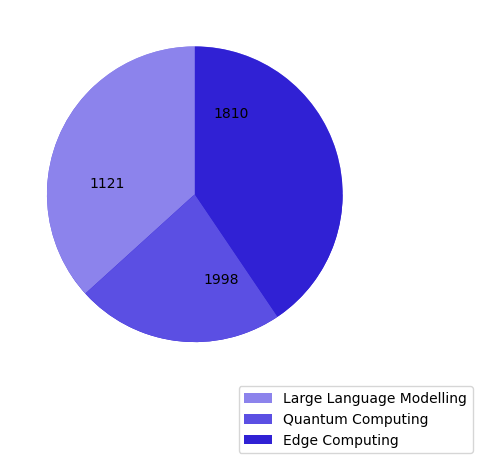

In [23]:
data_counts = np.array([len(llm_df),len(qc_df),len(ec_df)])
labels = ["Large Language Modelling", "Quantum Computing","Edge Computing"]
colors = ["#8c83ec","#5b4fe3","#3021d4"]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:d}".format(absolute)

plt.pie(data_counts, colors=colors,autopct=lambda pct: func(pct, data_counts))
patches, _ = plt.pie(data_counts, colors=colors, startangle=90)
plt.legend(patches, labels, loc="upper left", bbox_to_anchor=(0.6,0))
plt.show()

# LLM

In [24]:
llm_df['Abstract'] = llm_df['Abstract'].str.lower()
llm_df['Abstract'] = llm_df['Abstract'].apply(removeUnwantedCharacters)
llm_df['Abstract'] = llm_df['Abstract'].apply(cleaningText)

[('language models', 986), ('large language', 804), ('natural language', 705), ('pre trained', 518), ('language processing', 430), ('large scale', 395), ('language model', 377), ('state art', 363), ('models llms', 345), ('fine tuning', 345), ('deep learning', 257), ('machine learning', 240), ('experimental results', 211), ('results show', 199), ('sign language', 192), ('github com', 167), ('sentiment analysis', 166), ('pre training', 162), ('processing nlp', 161), ('artificial intelligence', 157), ('zero shot', 143), ('speech recognition', 142), ('question answering', 136), ('neural network', 131), ('real world', 130), ('fine tuned', 129), ('training data', 126), ('trained models', 124), ('vision language', 119), ('transformer based', 117), ('social media', 115), ('learning models', 114), ('low resource', 112), ('paper propose', 112), ('trained language', 109), ('domain specific', 106), ('machine translation', 106), ('recent years', 99), ('text data', 99), ('results demonstrate', 93), 

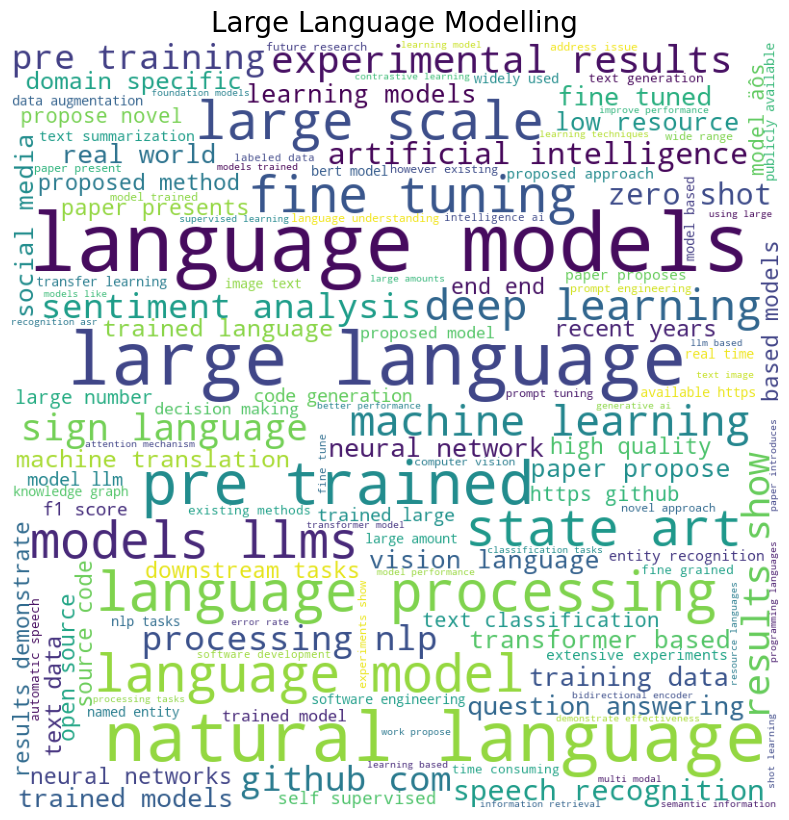

In [25]:
llm_words = ''
llm_tokens = llm_df['Abstract'].apply(remove_stopwords)
llm_dict = []
for token in llm_tokens:
    bigram_list = generate_bigrams(token)
    for bigram in bigram_list:
        llm_dict.append(bigram)
    
generate_wordcloud(llm_dict,"Large Language Modelling")

# Quantum Computing

In [26]:
qc_df['Abstract'] = qc_df['Abstract'].str.lower()
qc_df['Abstract'] = qc_df['Abstract'].apply(removeUnwantedCharacters)
qc_df['Abstract'] = qc_df['Abstract'].apply(cleaningText)

[('quantum computing', 242), ('state art', 203), ('machine learning', 151), ('quantum computers', 150), ('neural network', 135), ('deep learning', 129), ('proposed method', 127), ('results show', 126), ('experimental results', 107), ('neural networks', 95), ('post quantum', 92), ('fault diagnosis', 73), ('real time', 71), ('real world', 64), ('quantum circuits', 63), ('large scale', 62), ('article proposes', 62), ('power consumption', 60), ('quantum circuit', 59), ('high speed', 55), ('quantum computer', 54), ('convolutional neural', 53), ('optimization problems', 52), ('show proposed', 50), ('results demonstrate', 49), ('feature extraction', 49), ('quantum machine', 48), ('quantum cryptography', 48), ('quantum state', 47), ('quantum algorithms', 43), ('et al', 43), ('scale quantum', 42), ('based quantum', 42), ('internet things', 42), ('proposed algorithm', 42), ('lattice based', 42), ('edge computing', 42), ('high performance', 40), ('propose novel', 40), ('energy consumption', 39), 

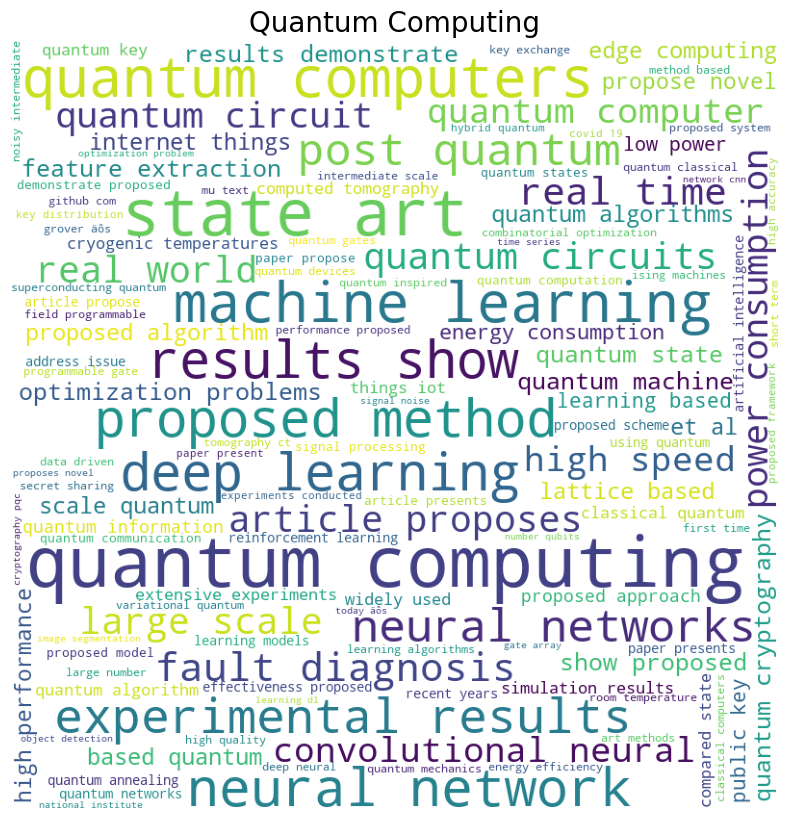

In [27]:
qc_words = ''
qc_tokens = qc_df['Abstract'].apply(remove_stopwords)
qc_dict = []
for token in qc_tokens:
    bigram_list = generate_bigrams(token)
    for bigram in bigram_list:
        qc_dict.append(bigram)
    
generate_wordcloud(qc_dict,"Quantum Computing")

# Edge Computing

In [28]:
ec_df['Abstract'] = ec_df['Abstract'].str.lower()
ec_df['Abstract'] = ec_df['Abstract'].apply(removeUnwantedCharacters)
ec_df['Abstract'] = ec_df['Abstract'].apply(cleaningText)

[('edge computing', 1778), ('energy consumption', 664), ('task offloading', 624), ('mobile edge', 616), ('computing mec', 561), ('resource allocation', 521), ('edge servers', 500), ('results show', 475), ('internet things', 455), ('real time', 449), ('simulation results', 449), ('optimization problem', 382), ('computation offloading', 331), ('reinforcement learning', 323), ('things iot', 298), ('users äô', 288), ('iot devices', 283), ('edge cloud', 275), ('experimental results', 262), ('edge devices', 255), ('results demonstrate', 253), ('state art', 251), ('computing resources', 249), ('federated learning', 241), ('edge server', 237), ('show proposed', 232), ('cloud computing', 214), ('low latency', 213), ('deep reinforcement', 205), ('proposed algorithm', 200), ('deep learning', 194), ('mobile devices', 184), ('cloud edge', 183), ('edge nodes', 179), ('machine learning', 169), ('real world', 167), ('proposed scheme', 167), ('unmanned aerial', 166), ('long term', 162), ('neural networ

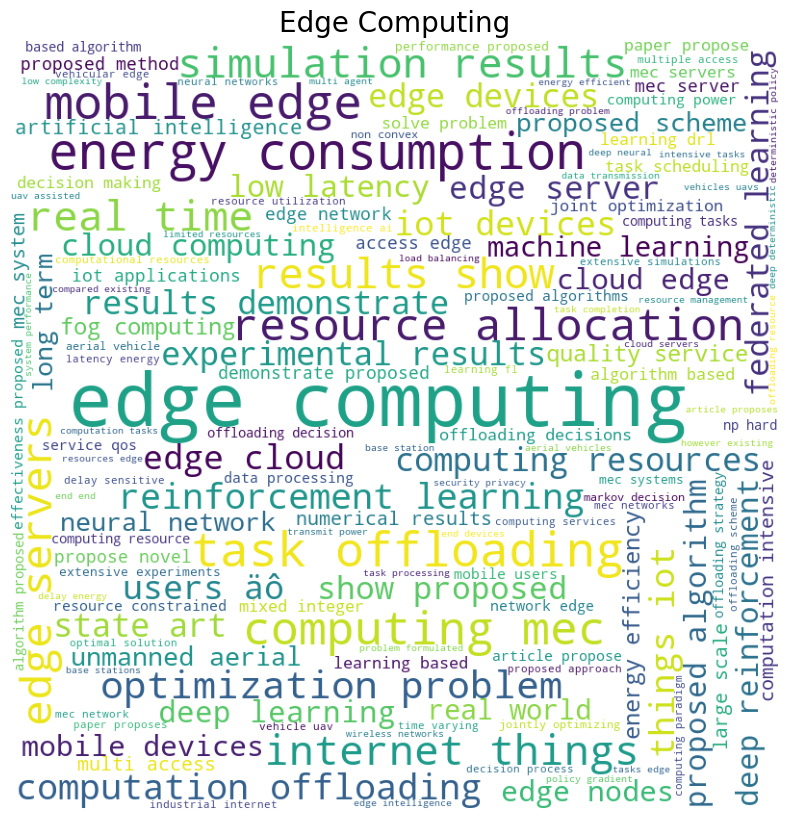

In [29]:
ec_words = ''
ec_tokens = ec_df['Abstract'].apply(remove_stopwords)
ec_dict = []
for token in ec_tokens:
    bigram_list = generate_bigrams(token)
    for bigram in bigram_list:
        ec_dict.append(bigram)
    
generate_wordcloud(ec_dict,"Edge Computing")